In [11]:
import pandas as pd
import bql
import seaborn as sns

In [3]:
bq = bql.Service()

In [4]:
tickers = ['ANZ AU Equity']
bonds = bq.univ.bonds(tickers, issuedby='CAST_PARENT_SUBS')

In [5]:
flds = {}
flds['ID'] = bq.data.id()
flds['Name'] = bq.data.name()
flds['1m return'] = (bq.data.px_last(fill='prev')/bq.data.px_last(fill='prev',dates='-1m')-1) *100
flds['1y return'] = (bq.data.px_last(fill='prev')/bq.data.px_last(fill='prev',dates='-1y')-1) *100
flds['duration'] = bq.data.duration()
flds['basel'] = bq.data.BASEL_III_DESIGNATION()
flds['crncy'] = bq.data.CRNCY()

In [6]:
req = bql.Request(bonds, flds, with_params={'mode':'cached'})
req_data = bq.execute(req)
req_df = pd.concat([res.df() for res in req_data], axis =1 )
print(req_df.head(5))
req_df['dur_quar'] = pd.qcut(req_df['duration'],4,labels=['1','2','3','4'])

                    ORIG_IDS             ID                Name       DATE  \
ID                                                                           
ZN679665 Corp  ANZ AU Equity  ZN679665 Corp  ANZ 5.088 12/08/25 2023-01-16   
BY242209 Corp  ANZ AU Equity  BY242209 Corp  ANZ 5.906 08/12/32 2023-01-16   
BZ024817 Corp  ANZ AU Equity  BZ024817 Corp  ANZ 6.405 09/20/34 2023-01-16   
BY633054 Corp  ANZ AU Equity  BY633054 Corp    ANZ 4 ½ 12/02/32 2023-01-16   
ZM382331 Corp  ANZ AU Equity  ZM382331 Corp  ANZ 3.652 01/20/26 2023-01-16   

              CURRENCY  1m return       DATE CURRENCY  1y return       DATE  \
ID                                                                            
ZN679665 Corp     None  -0.053888 2023-01-16     None        NaN 2023-01-16   
BY242209 Corp     None  -0.230447 2023-01-16     None        NaN 2023-01-16   
BZ024817 Corp     None  -0.144835 2023-01-16     None        NaN 2023-01-16   
BY633054 Corp     None  -0.502862 2023-01-16     None     

In [14]:
# Finding all the Tier 2s
cur_list =['AUD','USD','SGD']
Tier_list =['Tier 2']
req_data2 = req_df[req_df['crncy'].isin(cur_list)]
reg_tier2 = req_df[req_df['basel'].isin(Tier_list)]


[Text(0.5, 1.0, '1M Performance of ANZ Tier 2s based on duration')]

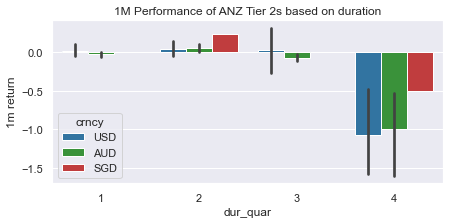

In [13]:
sns.set(rc={'figure.figsize':(7,3)})
sns.barplot(y='1m return',x='dur_quar',hue='crncy',data=req_data2, palette=['tab:blue','tab:green','tab:red']).set(title='1M Performance of ANZ Tier 2s based on duration')

[Text(0.5, 1.0, '1Y Performance of subordinated debt')]

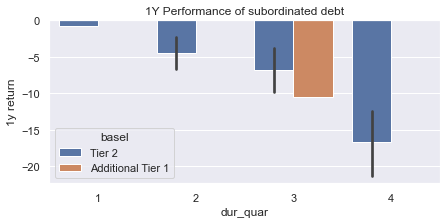

In [16]:
sns.barplot(y='1y return',x='dur_quar',hue='basel',data=req_df).set(title='1Y Performance of subordinated debt')